In [1]:
#Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Read the data into a dataframe
data = pd.read_csv('mushrooms.csv')

Data Exploration

In [3]:
#View the first 5 rows of the data to see the columns and layout of the data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Check the shape of the data
data.shape

(8124, 23)

In [5]:
#Check for null and unique values
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
#No null values
#Veil-type has only one unique value, so it can be dropped
data.drop('veil-type', axis=1, inplace=True)

In [7]:
#View all unqiue values and their counts in each column
for col in data.columns:
    print(data[col].value_counts())
    print()

e    4208
p    3916
Name: class, dtype: int64

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

f    4748
t    3376
Name: bruises, dtype: int64

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

f    7914
a     210
Name: gill-attachment, dtype: int64

c    6812
w    1312
Name: gill-spacing, dtype: int64

b    5612
n    2512
Name: gill-size, dtype: int64

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

t    4608
e    3516
Name: stalk-shape, dtype: int64

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

s    5176
k    2372
f     552
y      24
Name

In [8]:
#All unique values seem normal aside from stalk-root, which has a question mark
#This signifys an unknown value
#How I handle this can be determined after some visualizations as it takes up a large portion of the data

Data Visualization

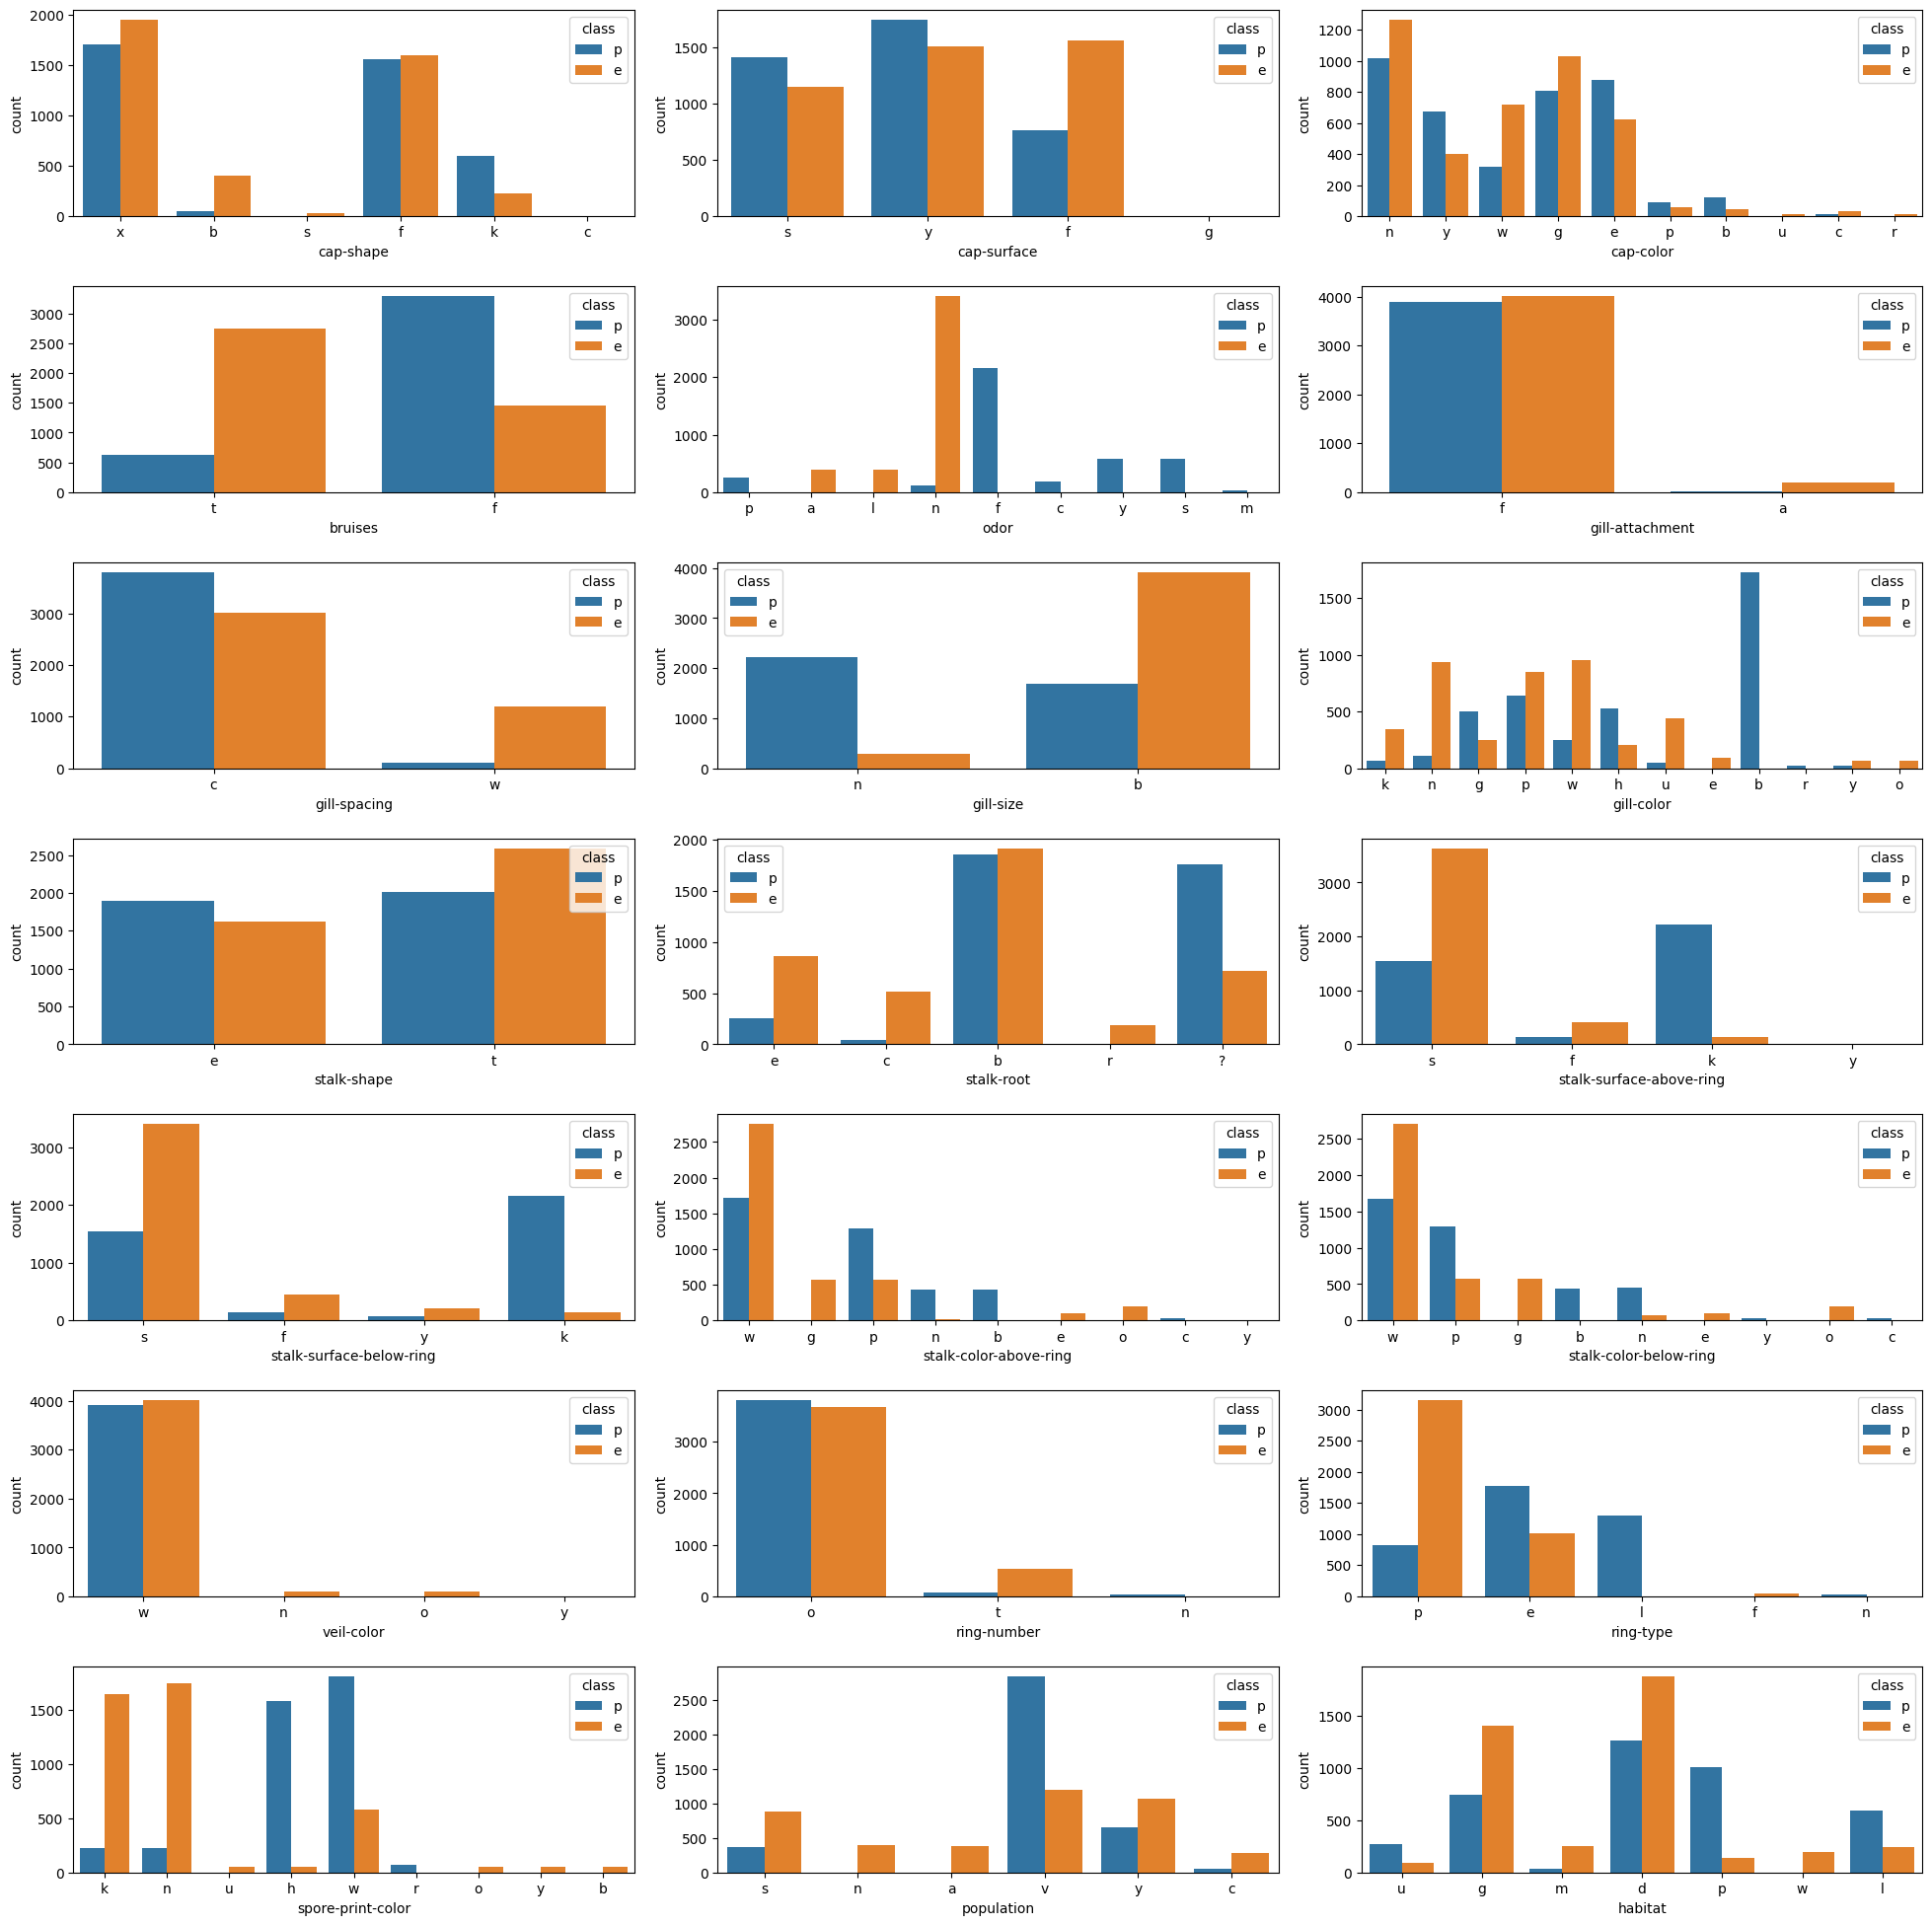

In [9]:
#Create a 7x3 grid of subplots to display all columns
fig, axes = plt.subplots(7, 3, figsize=(20, 20))
fig.tight_layout(pad=3.0)
#Barplot of each column to see the distribution of each unique value and how it relates to the class column
#This will help determine how to handle the unknown values in stalk-root
i = 0
for col in data.columns[1:]:
    sns.countplot(x = col, hue = 'class', data = data, ax = axes[i//3, i%3])
    i += 1

In [10]:
#Unknow values in stalk-root are mostly poisonous and will be left unaltered for at least the initial model

In [11]:
##Features that suggest mushrooms are more likely to be edible:
#cap-shape: bell
#cap-surface: fibrous
#cap-color: white
#bruises: yes
#odor: none, almond, anise
#gill-attachment: attached (but low sample size)
#gill-spacing: crowded
#gill-size: broad
#gill-color: white, purple, brown, black
#stalk-shape: tapering
#stalk-root: club, equal, rooted
#stalk-surface-above-ring: smooth, fibrous
#stalk-surface-below-ring: smooth, fibrous, scaly
#stalk-color-above-ring: white, gray, orange, red
#stalk-color-below-ring: white, gray, orange, red
#veil-color: brown, orange (but low sample size)
#ring-number: two
#ring-type: pendant
#spore-print-color: brown, black (and other colors, but low sample size)
#population: scattered, abundant, numerous, clustered
#habitat: woods, grasses, meadows

Data Preprocessing

In [12]:
#All data is categorical, so it can be encoded
#LabelEncoder will be used to encode the data
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [13]:
#View the encoded data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [14]:
#Split the data into features and labels
X = data.drop('class', axis=1)
y = data['class']

Logistic Regression

In [15]:
#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#Perform a logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Accuracy Score:  0.9563076923076923


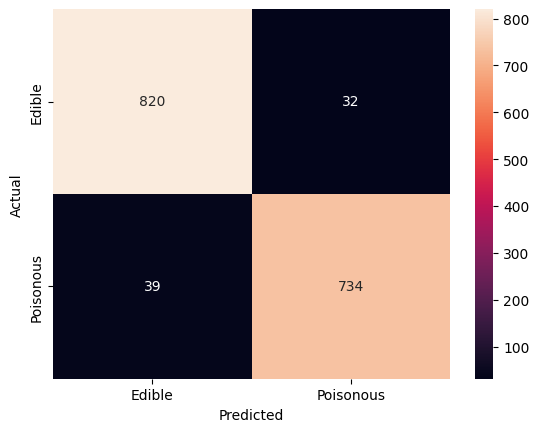

In [17]:
#View the accuracy score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
#Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
#Label the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
#Set categories for the confusion matrix
plt.xticks([0.5, 1.5], ['Edible', 'Poisonous'])
plt.yticks([0.5, 1.5], ['Edible', 'Poisonous'])
plt.show()

In [18]:
#The model is 95% accurate, which is good
#The model is slightly better at predicting edible mushrooms than poisonous mushrooms
#This is expected as there are more edible mushrooms than poisonous mushrooms in the dataset

In [19]:
#View the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       852
           1       0.96      0.95      0.95       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [20]:
#The model is not overfitting as the precision and recall are similar
#The model is not underfitting as the accuracy is high
#The model is performing well